In [113]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem.lancaster import LancasterStemmer
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [39]:
df = pd.read_pickle("text_df_v4.pkl")
df

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
1,"he COVID-19 pandemic has adversely impacted, a...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
4,"Accordingly, COVID-19 has negatively affected ...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
...,...,...,...,...,...,...,...,...,...,...
82232,The COVID-19 pandemic also may reduce demand f...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82233,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82234,The COVID-19 pandemic has also significantly i...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82235,The ultimate magnitude of the COVID-19 pandemi...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care


In [40]:
df.drop_duplicates(inplace=True)
df

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
1,"he COVID-19 pandemic has adversely impacted, a...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
4,"Accordingly, COVID-19 has negatively affected ...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
...,...,...,...,...,...,...,...,...,...,...
82232,The COVID-19 pandemic also may reduce demand f...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82233,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82234,The COVID-19 pandemic has also significantly i...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82235,The ultimate magnitude of the COVID-19 pandemi...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care


In [41]:
english_stop_words = stopwords.words('english')

In [42]:
additional_stop_words = ["covid", "pandemic", "novel", "coronavirus", "global", 
                        "million", "thousand", "hundred", "billion", "quarter", "year", 
                        "january", "february", "march", "april", "may", "june", 
                        "july", "august", "september", "october", "november", "december",
                        "jan", "feb", "mar", "apr", "jun", "jul", "aug", "sep", "oct", "nov", 
                         "dec", "company", "business", "us", "also", "could"]

In [43]:
all_stop_words = english_stop_words + additional_stop_words

In [44]:
def remove_numbers(text):
    return re.sub(r'\d+','', text)

In [45]:
df_clean = df.copy()
df_clean = df_clean[df_clean.disclosure_bool == 1]
df_clean["text"] = df_clean.text.apply(remove_numbers)
df_clean

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
1,"he COVID- pandemic has adversely impacted, and...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
4,"Accordingly, COVID- has negatively affected ou...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care
...,...,...,...,...,...,...,...,...,...,...
82231,The novel coronavirus (COVID-) was identified ...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82232,The COVID- pandemic also may reduce demand for...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82233,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care
82234,The COVID- pandemic has also significantly inc...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care


## LDA Model

In [46]:
vectorizer = CountVectorizer(stop_words=all_stop_words, min_df=10, ngram_range=(1,1))
doc_word = vectorizer.fit_transform(df_clean.text)
doc_word.shape

(50793, 7488)

In [47]:
lda_model = LatentDirichletAllocation(7)
doc_topic = lda_model.fit_transform(doc_word)
doc_topic.shape

(50793, 7)

In [48]:
topic_word = lda_model.components_
topic_word.shape

(7, 7488)

In [49]:
words = vectorizer.get_feature_names()
t = lda_model.components_.argsort(axis=1)[:,-1:-20:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['statements',
  'forward',
  'including',
  'looking',
  'factors',
  'risks',
  'results',
  'changes',
  'future',
  'report',
  'risk',
  'financial',
  'form',
  'ability',
  'impact',
  'uncertainties',
  'related',
  'actual',
  'operations'],
 ['cash',
  'credit',
  'impairment',
  'value',
  'assets',
  'reporting',
  'capital',
  'fair',
  'goodwill',
  'market',
  'term',
  'future',
  'result',
  'estimates',
  'based',
  'facility',
  'long',
  'current',
  'impact'],
 ['due',
  'costs',
  'lower',
  'sales',
  'revenue',
  'primarily',
  'increased',
  'demand',
  'related',
  'offset',
  'impact',
  'higher',
  'growth',
  'expenses',
  'decreased',
  'partially',
  'increase',
  'cost',
  'decrease'],
 ['months',
  'ended',
  'net',
  'due',
  'sales',
  'primarily',
  'compared',
  'three',
  'first',
  'related',
  'nine',
  'impact',
  'period',
  'decrease',
  'income',
  'six',
  'lower',
  'decreased',
  'increase'],
 ['including',
  'operations',
  'employees',


## NMF Model

In [50]:
vectorizer = TfidfVectorizer(stop_words=all_stop_words, min_df=10, ngram_range=(1,3))
doc_word = vectorizer.fit_transform(df_clean.text)
doc_word.shape

(50793, 77968)

In [51]:
nmf_model = NMF(7)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

(50793, 7)

In [52]:
topic_word = nmf_model.components_
topic_word.shape

(7, 77968)

In [53]:
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-30:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['employees',
  'customers',
  'including',
  'health',
  'products',
  'demand',
  'continue',
  'restrictions',
  'measures',
  'impact',
  'travel',
  'supply',
  'spread',
  'work',
  'world',
  'operations',
  'services',
  'economic',
  'significant',
  'result',
  'ability',
  'safety',
  'orders',
  'government',
  'actions',
  'certain',
  'impacted',
  'suppliers',
  'businesses'],
 ['months',
  'primarily',
  'sales',
  'ended',
  'due',
  'months ended',
  'lower',
  'compared',
  'net',
  'offset',
  'decreased',
  'decrease',
  'partially',
  'three',
  'partially offset',
  'primarily due',
  'costs',
  'revenue',
  'nine',
  'driven',
  'expenses',
  'increased',
  'nine months',
  'higher',
  'increase',
  'related',
  'three months',
  'three months ended',
  'period'],
 ['statements',
  'forward looking',
  'looking',
  'forward',
  'looking statements',
  'forward looking statements',
  'risks',
  'factors',
  'report',
  'form',
  'uncertainties',
  'risk',
  'ris

In [54]:
topic_names = {0:"Health & Safety", 1:"Revenue Impact", 2:"Risk Factors", 3:"Results of Operations", 
               4:"Goodwill Impairment", 5:"Capital and Liquidity", 6:"Tax"}

In [55]:
components_df = pd.DataFrame(nmf_model.components_, columns=vectorizer.get_feature_names()).T.rename(columns=topic_names).reset_index()

In [56]:
components_df

,index,Health & Safety,Revenue Impact,Risk Factors,Results of Operations,Goodwill Impairment,Capital and Liquidity,Tax
0,aa,0.000000,0.000025,0.000214,0.000000,0.000710,0.002056,0.000000
1,aag,0.000000,0.001051,0.000902,0.000000,0.001438,0.000824,0.001732
2,aao,0.000733,0.000239,0.000118,0.000000,0.000288,0.000237,0.000270
3,abandon,0.005507,0.000000,0.000893,0.000000,0.001559,0.000000,0.000000
4,abandonment,0.002317,0.001049,0.004016,0.000000,0.000626,0.000000,0.000123
...,...,...,...,...,...,...,...,...
77963,zero interest,0.000277,0.000122,0.000000,0.000000,0.000000,0.001257,0.001283
77964,zero percent,0.000040,0.000683,0.000000,0.000000,0.000000,0.002282,0.002485
77965,zika,0.003822,0.000000,0.000000,0.000538,0.000000,0.000000,0.000000
77966,zone,0.000763,0.002257,0.000000,0.001009,0.000113,0.000419,0.000234


In [57]:
components_melt = components_df.melt(id_vars = "index").rename(columns={"index":"word(s)", "variable":"topic"})
components_melt

,word(s),topic,value
0,aa,Health & Safety,0.000000
1,aag,Health & Safety,0.000000
2,aao,Health & Safety,0.000733
3,abandon,Health & Safety,0.005507
4,abandonment,Health & Safety,0.002317
...,...,...,...
545771,zero interest,Tax,0.001283
545772,zero percent,Tax,0.002485
545773,zika,Tax,0.000000
545774,zone,Tax,0.000234


In [58]:
components_melt.to_csv("components_melt.csv")

In [59]:
components_melt_top = components_melt.sort_values(['topic', 'value'], ascending=False).groupby('topic').head(15).reset_index()
del components_melt_top["index"]
components_melt_top

,word(s),topic,value
0,act,Tax,1.418427
1,tax,Tax,1.174627
2,cares,Tax,1.105561
3,cares act,Tax,1.101111
4,relief,Tax,0.741155
...,...,...,...
100,markets,Capital and Liquidity,0.353186
101,program,Capital and Liquidity,0.322414
102,share,Capital and Liquidity,0.319197
103,repurchase,Capital and Liquidity,0.318832


In [60]:
components_melt_top.to_csv("components_melt_top.csv")

## t-SNE - Model Visualization

In [61]:
nmf_embedding = nmf_model.transform(doc_word)

In [62]:
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0))/nmf_embedding.std(axis=0)

In [192]:
from sklearn.manifold import TSNE
TSNE = TSNE(perplexity=75, learning_rate = 20000, metric="cosine")

In [193]:
tsne_embedding = TSNE.fit_transform(nmf_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])

In [194]:
tsne_embedding

,x,y
0,44.167786,44.319546
1,76.171837,65.718925
2,-3.736431,79.385994
3,-97.405991,53.393642
4,-9.694936,81.945259
...,...,...
50788,-70.484169,96.235786
50789,10.075514,112.584229
50790,33.139347,97.248375
50791,-78.938599,-26.657379


In [195]:
tsne_embedding['topic'] = nmf_embedding.argmax(axis=1)

In [196]:
tsne_embedding["topic_name"] = tsne_embedding.topic.map(topic_names)

In [197]:
tsne_embedding

,x,y,topic,topic_name
0,44.167786,44.319546,2,Risk Factors
1,76.171837,65.718925,3,Results of Operations
2,-3.736431,79.385994,0,Health & Safety
3,-97.405991,53.393642,0,Health & Safety
4,-9.694936,81.945259,0,Health & Safety
...,...,...,...,...
50788,-70.484169,96.235786,0,Health & Safety
50789,10.075514,112.584229,0,Health & Safety
50790,33.139347,97.248375,3,Results of Operations
50791,-78.938599,-26.657379,5,Capital and Liquidity


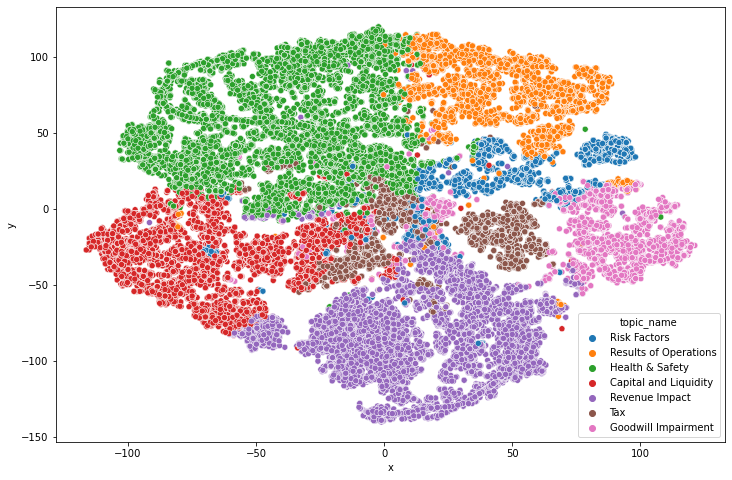

In [198]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x=tsne_embedding.x, y=tsne_embedding.y, hue=tsne_embedding.topic_name);

In [199]:
tsne_embedding.to_csv("tsne.csv")

## Perform Sentiment Analysis

In [70]:
sid_obj = SentimentIntensityAnalyzer()
sentiment = []
for text in df_clean.text:
    sentiment.append(sid_obj.polarity_scores(text))

In [71]:
len(sentiment)

50793

In [74]:
sentiment

[{'neg': 0.023, 'neu': 0.837, 'pos': 0.141, 'compound': 0.9855},
 {'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.659},
 {'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.6369},
 {'neg': 0.046, 'neu': 0.821, 'pos': 0.133, 'compound': 0.7717},
 {'neg': 0.063, 'neu': 0.847, 'pos': 0.089, 'compound': 0.4404},
 {'neg': 0.1, 'neu': 0.776, 'pos': 0.123, 'compound': 0.2878},
 {'neg': 0.089, 'neu': 0.846, 'pos': 0.065, 'compound': -0.4215},
 {'neg': 0.042, 'neu': 0.836, 'pos': 0.122, 'compound': 0.5574},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.197, 'neu': 0.769, 'pos': 0.033, 'compound': -0.9963},
 {'neg': 0.021, 'neu': 0.849, 'pos': 0.13, 'compound': 0.9855},
 {'neg': 0.102, 'neu': 0.832, 'pos': 0.066, 'compound': -0.4939},
 {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.8402},
 {'neg': 0.032, 'neu': 0.926, 'pos': 0.042, 'compound': 0.0258},
 {'neg': 0.018, 'neu': 0.917, 'pos': 0.065, 'compound': 0.7951},
 {'neg': 0.032, 'neu': 0.888, 'pos': 0.

## Create Final DataFrame

In [75]:
final_df = df[df.disclosure_bool == 1].reset_index()
final_df['topic'] = doc_topic.argmax(axis=1)
final_df["topic_name"] = final_df.topic.map(topic_names)
final_df = final_df.join(pd.DataFrame(sentiment))
del final_df["index"]
final_df

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector,topic,topic_name,neg,neu,pos,compound
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,2,Risk Factors,0.023,0.837,0.141,0.9855
1,"he COVID-19 pandemic has adversely impacted, a...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,3,Results of Operations,0.186,0.814,0.000,-0.6590
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health & Safety,0.137,0.863,0.000,-0.6369
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health & Safety,0.046,0.821,0.133,0.7717
4,"Accordingly, COVID-19 has negatively affected ...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health & Safety,0.063,0.847,0.089,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50788,The novel coronavirus (COVID-19) was identifie...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,0,Health & Safety,0.060,0.872,0.068,0.3094
50789,The COVID-19 pandemic also may reduce demand f...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,3,Results of Operations,0.090,0.862,0.048,-0.6249
50790,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,3,Results of Operations,0.061,0.915,0.024,-0.3400
50791,The COVID-19 pandemic has also significantly i...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,5,Capital and Liquidity,0.149,0.750,0.101,-0.7717


In [91]:
final_df["quarter"] = pd.PeriodIndex(pd.to_datetime(final_df.filed_at), freq='Q')
final_df

,text,linkToTxt,disclosure_bool,cik,company_name,filed_at,form_type,ticker,name,sector,topic,topic_name,neg,neu,pos,compound,quarter
0,This report contains forward-looking statemen...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,2,Risk Factors,0.023,0.837,0.141,0.9855,2020Q4
1,"he COVID-19 pandemic has adversely impacted, a...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,3,Results of Operations,0.186,0.814,0.000,-0.6590,2020Q4
2,Our global operations expose us to risks assoc...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health & Safety,0.137,0.863,0.000,-0.6369,2020Q4
3,Due to these measures we experienced significa...,https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health & Safety,0.046,0.821,0.133,0.7717,2020Q4
4,"Accordingly, COVID-19 has negatively affected ...",https://www.sec.gov/Archives/edgar/data/109087...,1,1090872,"AGILENT TECHNOLOGIES, INC.",2020-12-17,10-K,A,Agilent Technologies Inc,Health Care,0,Health & Safety,0.063,0.847,0.089,0.4404,2020Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50788,The novel coronavirus (COVID-19) was identifie...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,0,Health & Safety,0.060,0.872,0.068,0.3094,2020Q2
50789,The COVID-19 pandemic also may reduce demand f...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,3,Results of Operations,0.090,0.862,0.048,-0.6249,2020Q2
50790,"Moreover, measures imposed by governments and ...",https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,3,Results of Operations,0.061,0.915,0.024,-0.3400,2020Q2
50791,The COVID-19 pandemic has also significantly i...,https://www.sec.gov/Archives/edgar/data/155528...,1,1555280,Zoetis Inc.,2020-05-06,10-Q,ZTS,Zoetis,Health Care,5,Capital and Liquidity,0.149,0.750,0.101,-0.7717,2020Q2


In [92]:
final_df.to_csv("final_df.csv")

## Weighted DataFrame

In [77]:
disclosure_count = pd.DataFrame(final_df.groupby("sector")["text"].nunique()).reset_index()
disclosure_count

,sector,text
0,Communication Services,2172
1,Consumer Discretionary,6787
2,Consumer Staples,2651
3,Energy,1037
4,Financials,6284
5,Health Care,6081
6,Industrials,6983
7,Information Technology,4795
8,Materials,2029
9,Real Estate,2456


In [78]:
#calculate sector weights in S&P 500 - for Tableau viz
sector_weights = pd.DataFrame(final_df.groupby("sector")["ticker"].nunique())
sector_weights["sector_weight"] = sector_weights["ticker"]/np.sum(sector_weights["ticker"])
sector_weights.reset_index(inplace=True)
del sector_weights["ticker"]
sector_weights

,sector,sector_weight
0,Communication Services,0.052632
1,Consumer Discretionary,0.121457
2,Consumer Staples,0.060729
3,Energy,0.048583
4,Financials,0.121457
5,Health Care,0.127530
6,Industrials,0.147773
7,Information Technology,0.149798
8,Materials,0.054656
9,Real Estate,0.060729


In [80]:
viz_df = pd.merge(disclosure_count, sector_weights, on="sector")
viz_df["weighted_text"] = viz_df.text*viz_df.sector_weight
viz_df

,sector,text,sector_weight,weighted_text
0,Communication Services,2172,0.052632,114.315789
1,Consumer Discretionary,6787,0.121457,824.331984
2,Consumer Staples,2651,0.060729,160.991903
3,Energy,1037,0.048583,50.380567
4,Financials,6284,0.121457,763.238866
5,Health Care,6081,0.127530,775.512146
6,Industrials,6983,0.147773,1031.900810
7,Information Technology,4795,0.149798,718.279352
8,Materials,2029,0.054656,110.896761
9,Real Estate,2456,0.060729,149.149798


In [81]:
viz_df.to_csv("viz_df.csv")

## Create dictionary of topic:text mappings

In [35]:
multivalue_dict = defaultdict(list)
for inx, row in df.iterrows():
    multivalue_dict[row['topic']].append(row['text'])

KeyError: 'topic'

In [ ]:
multivalue_dict